In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [2]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "f6hHQP85yLIVbI6vwPUYq98Mu"
consumer_secret = "pRvYguLVdOsB7Z4ELrosCw5JicgdKycHCbt8OCpKS37rrbz5hO"
access_token = "1151404299169124353-FSQWpdje4eoDiXK3WkLhySvnyxTLLU"
access_token_secret = "GGXoNQbHUqQ3BNbMDUhVPJVSWWvaDlPgpThpFdfYILS5r"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [3]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [4]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=100, lang="en").items():
        print(i, end='\r')
        df.loc[i,"Date"] = str(tweet.created_at)
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [5]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["fifa"]
get_tweets(Topic , Count=100)

TweepyException: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%5B%27fifa%27%5D&count=100&lang=en (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001A751343F70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
df.head(100)

In [157]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [158]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [159]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [160]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(100)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-11-25 11:05:59+00:00,Niffswich,False,@rovvmut_ Endia? stfu.. Following the invitati...,0,0,In your closet,endia stfu following the invitation to controv...
1,2022-11-25 11:05:59+00:00,𝙨𝙞𝙯𝙡𝙖•♬•wa🍁𝑚𝑎 𝙍𝙤𝙤𝙩𝙮🇯🇲,False,RT @Goddie_Ke: FIFA choosing this World cup's ...,0,37,"Nairobi, Kenya",rt ke fifa choosing this world cup s player of...
2,2022-11-25 11:05:58+00:00,Walter,False,RT @AfricaFactsZone: Breel Embolo refuses to c...,0,938,"Nairobi, Kenya",rt breel embolo refuses to celebrate after sco...
3,2022-11-25 11:05:58+00:00,Mr.pi,False,RT @daaarkmatter: Why is Qatari regime so afra...,0,5,,rt why is qatari regime so afraid of woman lif...
4,2022-11-25 11:05:58+00:00,Reece Moradkhan,False,RT @SimonBrodkin: BREAKING: Rain expected in Q...,0,1566,,rt breaking rain expected in qatar today fifa ...
...,...,...,...,...,...,...,...,...
95,2022-11-25 11:05:21+00:00,Reuters World,True,RT @Reuters: FAW said it would contact world s...,0,2,NYC,rt faw said it would contact world soccer gove...
96,2022-11-25 11:05:21+00:00,Iconique K,False,"@FIFAWorldCup @Cristiano Yeah,everything playe...",0,0,,yeah everything played out as written by fifa
97,2022-11-25 11:05:20+00:00,Rookery Mike,False,Peaceful protest is once again deemed unaccept...,0,0,Bucks,peaceful protest is once again deemed unaccept...
98,2022-11-25 11:05:20+00:00,Mairead #HerdImmunityKills #Have211KReallyDied...,False,RT @megreyes_: Friendly reminder he's the firs...,0,11758,"England, United Kingdom",rt friendly reminder he s the first man to sco...


In [161]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(100)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-11-25 11:05:59+00:00,Niffswich,False,@rovvmut_ Endia? stfu.. Following the invitati...,0,0,In your closet,endia stfu following the invitation to controv...,Positive
1,2022-11-25 11:05:59+00:00,𝙨𝙞𝙯𝙡𝙖•♬•wa🍁𝑚𝑎 𝙍𝙤𝙤𝙩𝙮🇯🇲,False,RT @Goddie_Ke: FIFA choosing this World cup's ...,0,37,"Nairobi, Kenya",rt ke fifa choosing this world cup s player of...,Positive
2,2022-11-25 11:05:58+00:00,Walter,False,RT @AfricaFactsZone: Breel Embolo refuses to c...,0,938,"Nairobi, Kenya",rt breel embolo refuses to celebrate after sco...,Neutral
3,2022-11-25 11:05:58+00:00,Mr.pi,False,RT @daaarkmatter: Why is Qatari regime so afra...,0,5,,rt why is qatari regime so afraid of woman lif...,Neutral
4,2022-11-25 11:05:58+00:00,Reece Moradkhan,False,RT @SimonBrodkin: BREAKING: Rain expected in Q...,0,1566,,rt breaking rain expected in qatar today fifa ...,Negative
...,...,...,...,...,...,...,...,...,...
95,2022-11-25 11:05:21+00:00,Reuters World,True,RT @Reuters: FAW said it would contact world s...,0,2,NYC,rt faw said it would contact world soccer gove...,Neutral
96,2022-11-25 11:05:21+00:00,Iconique K,False,"@FIFAWorldCup @Cristiano Yeah,everything playe...",0,0,,yeah everything played out as written by fifa,Neutral
97,2022-11-25 11:05:20+00:00,Rookery Mike,False,Peaceful protest is once again deemed unaccept...,0,0,Bucks,peaceful protest is once again deemed unaccept...,Positive
98,2022-11-25 11:05:20+00:00,Mairead #HerdImmunityKills #Have211KReallyDied...,False,RT @megreyes_: Friendly reminder he's the firs...,0,11758,"England, United Kingdom",rt friendly reminder he s the first man to sco...,Positive


In [162]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 RT @kentish_made: If the following has really pissed you 
off this week then I think we should be friends.
1. Michelle Mone and the great P…

Clean tweet:
 rt made if the following has really pissed you off this week then i think we should be friends 1 michelle mone and the great p

Sentiment of the tweet:
 Positive


In [163]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['fifa'] are : 101
Total Positive Tweets are : 32
Total Negative Tweets are : 16
Total Neutral Tweets are : 53


C:\Users\pf2xg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

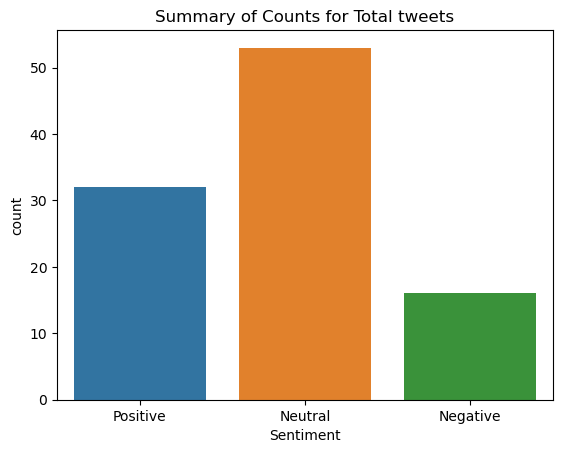

In [165]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

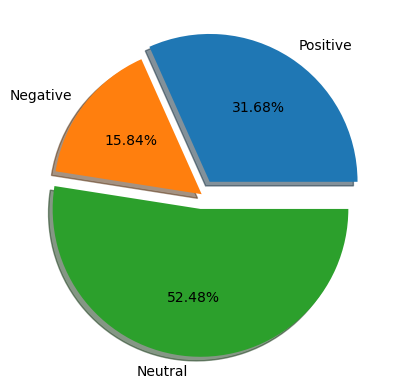

In [166]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

C:\Users\pf2xg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

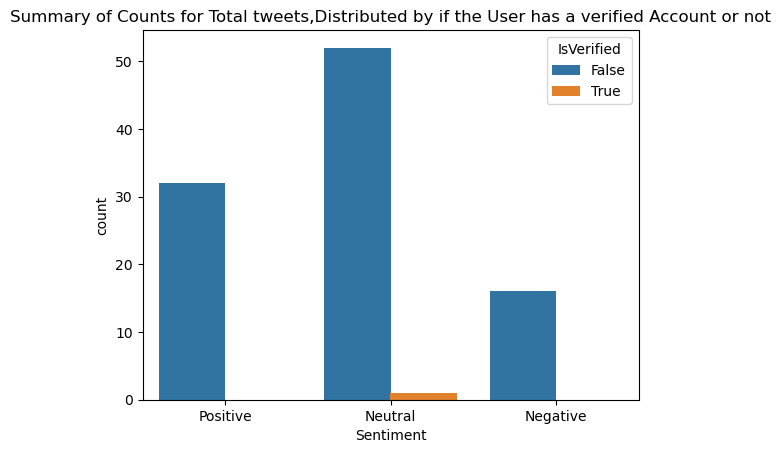

In [167]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [168]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

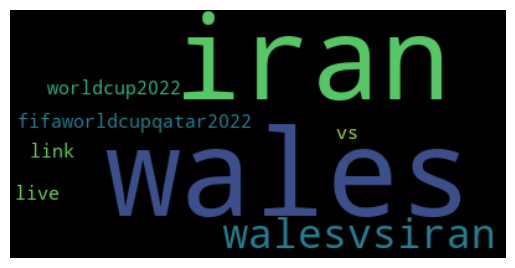

In [169]:
# Start with one review:

text = df.clean_tweet[5]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 9760 words in the combination of all review.


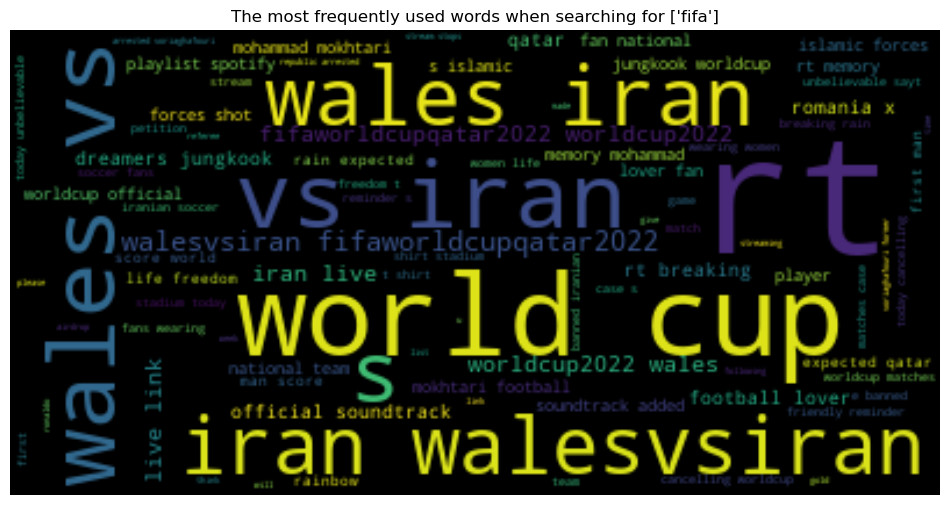

In [170]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 9760 words in the combination of all review.


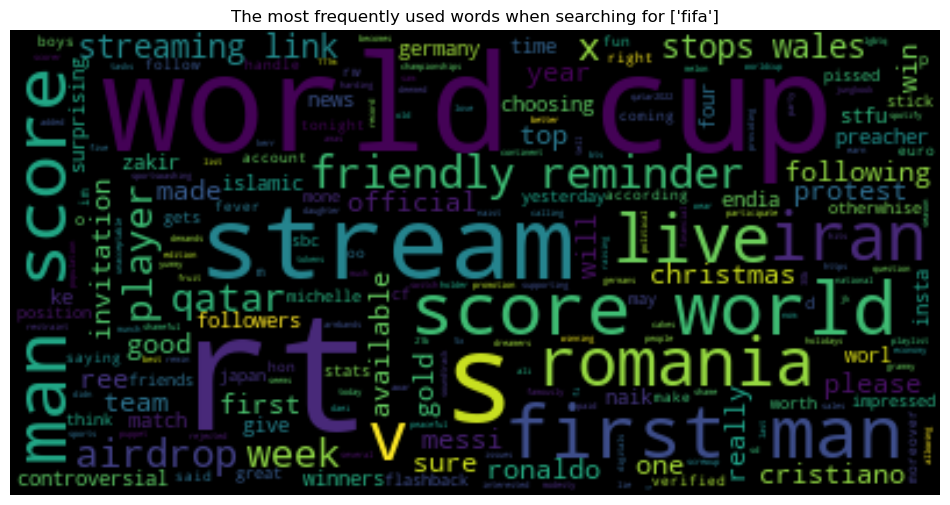

In [171]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()